# Loan Data Exploration 
## by Nour El Hedi Zrelli

## Introduction

This dataset contains informations about 113937 loans with 81 variables on each loan such as loan amount, borrower rate ( interest rate ), current loan status, borrower income, and many others.



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Loading the dataset
df = pd.read_csv('prosperLoanData.csv')

In [4]:
# Checking the dataset shape
df.shape

(113937, 81)

In [5]:
# An overview of the dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20



### Let's take a look at the potential needed features



In [6]:
# Checking if ther are any null values in the BorrowerAPR column
df.BorrowerAPR.isnull().sum()

25

In [7]:
# Let's only consider rows with non null Borrower APR values
df = df[df['BorrowerAPR'].notna()]

In [8]:
# Checking if ther are still any null values in the BorrowerAPR column
df.BorrowerAPR.isnull().sum()

0

In [9]:
df.LoanOriginalAmount.isnull().sum()

0

There are no null values in the LoanOriginalAmount column 

In [10]:
df.StatedMonthlyIncome.isnull().sum()

0

There are no null values in the StatedMonthlyIncome column 

In [11]:
# Let's see what are the diffrent Credit grades given
df.CreditGrade.unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [12]:
#Checking for null values in the Credit Grade column
df.CreditGrade.isnull().sum()

84984

There are many null values, we can't drop them because we will lose a considerable amount of information. We will look at another feature instead

In [13]:
df.Term.unique()

array([36, 60, 12], dtype=int64)

The loans given in this dataset are refundable over either 12,36 or 60 months.

In [14]:
# Changing the Term column to category type
df.Term=df.Term.astype('category')

In [15]:
df.Term.value_counts()

36    87753
60    24545
12     1614
Name: Term, dtype: int64

In [16]:
df['ProsperRating (Alpha)'].isnull().sum()

29059

The prosper ratings null values are less important compared to the credit grade null values, we can work with this feature

In [17]:
df.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

### What is the structure of your dataset?

This dataset contains 113937 rows and 81 columns. 

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest is the BorrowerAPR, since I will be trying to answer the following question : What affects the Borrower's APR ? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that will help support my investigation are the total amount of the loan ( LoanOriginalAmount ), the monthly income the borrower stated at the time the listing was created ( StatedMonthlyIncome ), the Prosper Rating assigned at the time the listing was created between AA - HR (ProsperRating (Alpha) ), the employment status of the borrower at the time they posted the listing ( EmploymentStatus ) and the length of the loan expressed in months (Term). 

## Univariate Exploration

First, let's look at our main feature of interest, the BorrowerAPR

In [18]:
# Let's calculate some statistical data on the BorrowerAPR column
df.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

The lowest APR is 0.00653, while the highest is 0.51229. It will be proper to look use small bins, when plotting the histogram.

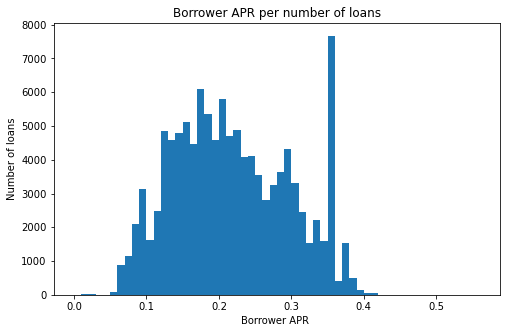

In [19]:
plt.figure(figsize=[8,5])
bins=np.arange(0,df.BorrowerAPR.max()+0.05,0.01)
plt.hist(data=df,x='BorrowerAPR',bins=bins)
plt.xlabel('Borrower APR ')
plt.ylabel('Number of loans')
plt.title('Borrower APR per number of loans');

The distribution of the borrower APR looks multimodal.There are many peaks on different intervals. There are few loans with close to 0 APR and few loans with APR over than 0.4. Let's investigate those loans. 

In [20]:
# Let's only consider the feature we are interested in.
features = ['BorrowerAPR','LoanOriginalAmount','StatedMonthlyIncome','ProsperRating (Alpha)','EmploymentStatus','Term']
df1 = df[features]

In [21]:
df1[df1.BorrowerAPR<0.02]

,BorrowerAPR,LoanOriginalAmount,StatedMonthlyIncome,ProsperRating (Alpha),EmploymentStatus,Term
1484,0.01657,5000,4576.000000,NaN,Not available,36
15993,0.01823,2000,1833.333333,NaN,Full-time,36
26650,0.01647,4500,2500.000000,NaN,Not available,36
29859,0.01650,1000,8583.333333,NaN,NaN,36
33287,0.01657,4000,2500.000000,NaN,Full-time,36
38187,0.01657,5000,0.000000,NaN,Not employed,36
46874,0.01315,1900,5000.000000,NaN,Full-time,36
50251,0.01325,5000,291.666667,NaN,Full-time,36
53423,0.01548,1100,2166.666667,NaN,Full-time,36
53558,0.00864,2600,1733.333333,NaN,Not available,36


In [22]:
df1[df1.BorrowerAPR>0.43]

,BorrowerAPR,LoanOriginalAmount,StatedMonthlyIncome,ProsperRating (Alpha),EmploymentStatus,Term
18326,0.45857,3000,10000.000000,NaN,NaN,36
22195,0.46201,1789,2916.666667,NaN,NaN,36
36018,0.51229,1500,2838.000000,NaN,NaN,36
56761,0.50633,3000,0.000000,NaN,NaN,36
82043,0.48873,3000,1583.333333,NaN,NaN,36
103973,0.45857,2800,3750.000000,NaN,NaN,36


There are no patterns we can deduce comparing the extreme APR rates. Let's investigate more.

Let's look through the first explicative feature, the origination amount of the loan ( LoanOriginalAmount )

In [23]:
# First let's calculate the mean, median and percentiles of the column
df1.LoanOriginalAmount.describe()

count    113912.000000
mean       8338.015661
std        6245.940592
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

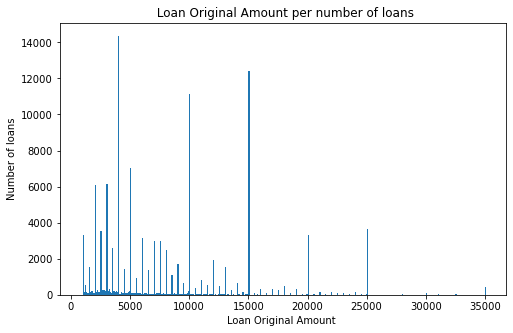

In [24]:
plt.figure(figsize=[8,5])
bins=np.arange(800,df1.LoanOriginalAmount.max()+200,100)
plt.hist(data=df,x='LoanOriginalAmount',bins=bins)
plt.xlabel('Loan Original Amount ')
plt.ylabel('Number of loans')
plt.title(' Loan Original Amount per number of loans');

There are important peaks around the 5k, 10k, 15k,20k,25k. A priori, we can conclude that loans are mostly multiples of 1k.
There seem to be an important amount of loans less than 5k, let's investigate that further.

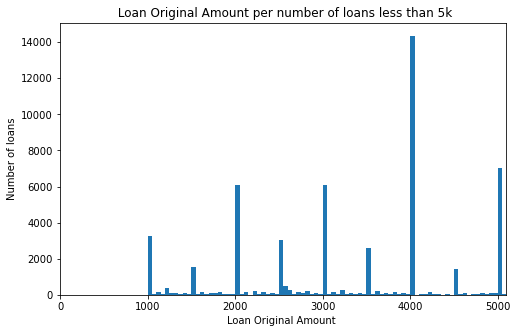

In [25]:
plt.figure(figsize=[8,5])
bins=np.arange(800,df1.LoanOriginalAmount.max()+1000,50)
plt.hist(data=df,x='LoanOriginalAmount',bins=bins)
plt.xlim((0,5100))
plt.xlabel('Loan Original Amount ')
plt.ylabel('Number of loans')
plt.title(' Loan Original Amount per number of loans less than 5k');

This confirms that most loans amounts are multiples of 1k.

Now let's look at the second feature, the stated monthly income.

In [26]:
# Describe the columns
df1.StatedMonthlyIncome.describe()

count    1.139120e+05
mean     5.606973e+03
std      7.478338e+03
min      0.000000e+00
25%      3.200000e+03
50%      4.666667e+03
75%      6.817083e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [27]:
df1.StatedMonthlyIncome.mean()

5606.972787474833

The mean is around 5606, the median is around 4666. This distribution seems to be right-skewed. We will set the maximum value of bins around 5k.

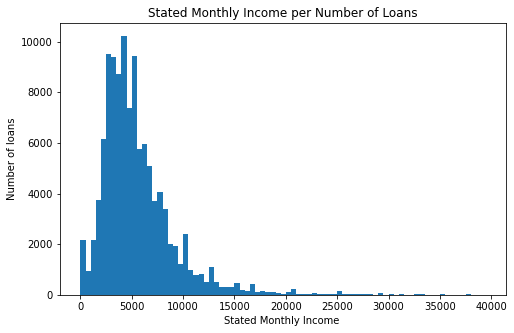

In [28]:
plt.figure(figsize=[8,5])
bins=np.arange(0,40000,500)
plt.hist(data=df1,x='StatedMonthlyIncome',bins=bins)
plt.xlabel('Stated Monthly Income ')
plt.ylabel('Number of loans')
plt.title('Stated Monthly Income per Number of Loans');

The graph confirms that the distribution of the stated monthly incomes is right-skewed. Most loan seekers have incomes between 2k and 10k.

Let's calculate the percentage of people with stated monthly income over 30k.

In [40]:
df1[df1['StatedMonthlyIncome']>30000].shape[0] / df1.shape[0]

0.0028706369829341947

There are 327 people with an income over 30k. The percentage of people with stated monthly income over 30k is 0.00287. We can then, consider those values as outliers and remove them.

In [44]:
# Removing the outliers
df1=df1[df1['StatedMonthlyIncome']<30000]

Now let's look at the third feature Prosper Rating ( Alpha ) 

In [52]:
# Looking at the ratings values 
df1['ProsperRating (Alpha)'].value_counts()

C     18288
B     15512
A     14488
D     14251
E      9785
HR     6918
AA     5345
Name: ProsperRating (Alpha), dtype: int64

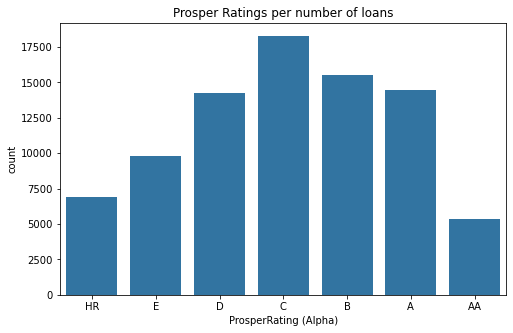

In [58]:
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data=df1, x='ProsperRating (Alpha)',order=['HR','E','D','C','B','A','AA'],color=base_color).set_title('Prosper Ratings per number of loans');

Most ratings are D,C or B ratings.

Let's look at the fourth feature, the employment status.

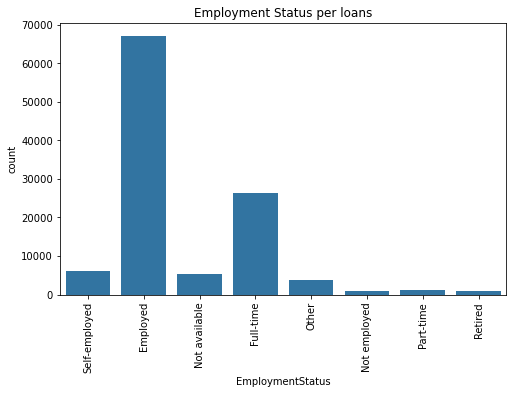

In [65]:
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data=df1, x='EmploymentStatus',color=base_color,).set_title('Employment Status per loans');
# Use xticks to rotate the category labels counter-clockwise
plt.xticks(rotation=90);

The majority of the loans are accorded to employed and full-time employed people. Not employed people are unlikely to get loans.

Now let's look at the last feature the Term.

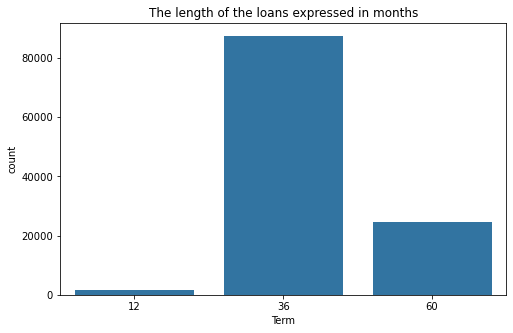

In [68]:
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data=df1, x='Term',color=base_color,).set_title('The length of the loans expressed in months');

The greater part of the loans are refundable over 36 months. Very few loans are refundable over 12 months.

In [75]:
# Calculating the percentage of loans refundable over 12 months
df1[df1['Term']==12].shape[0]/df1.shape[0]

0.014124443035522447

Only 0.014% of loans are refundable over 1 year.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of the borrower APR looks multimodal.There are many peaks on different intervals. There are few loans with close to 0 APR and few loans with APR over than 0.4. There were no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The stated monthly income distribution is highly skewed to the right. There are 327 people with an income over 30k which means the percentage of people with stated monthly income over 30k is 0.00287. I considered that as an outlier and dropped those values. There were no need to perform any transformations.

## Bivariate Exploration



Let's start by looking at the relationship between the Borrower APR and the original amount of the loan.

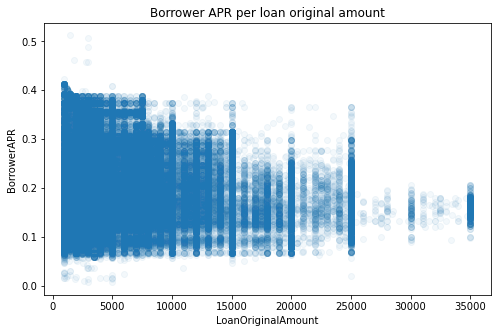

In [90]:
plt.figure(figsize=[8,5])
plt.scatter(data = df1 , x = 'LoanOriginalAmount', y = 'BorrowerAPR',alpha=1/20) 
#alpha is added to add transparency since there were an overplotting
plt.ylabel('BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.title('Borrower APR per loan original amount');

Looking at this bivariate relationship between the loan original amount and the BorrowerAPR, the loans with an amount less than 25k seem to have a borrower APR between 0.02 and 0.4, for loans with an amount over 25k the APR is between 0.1 and 0.2.

Let's look at the relationship between the Borrower APR and the stated monthly income.

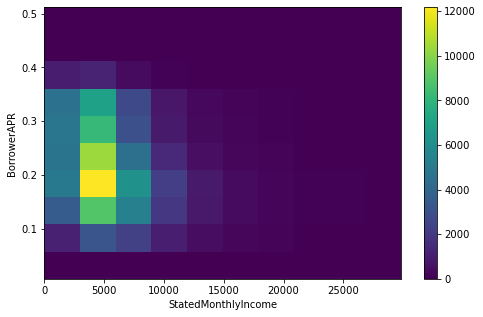

In [101]:
plt.figure(figsize=[8,5])
plt.hist2d(data = df1, x = 'StatedMonthlyIncome', y = 'BorrowerAPR')
plt.colorbar()
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('BorrowerAPR');


This heatmap shows that for people declaring they earn less than 10k a month, the Borrower APR is more likely to be between 0.1 and 0.35. For stated monthly income over 10k, the Borrower APR seems to vary between 0.1 and 0.5. We need to find another variable to explain the change of the APR.

Now let's look at the relationship between the Borrower APR and the Prosper Rating.

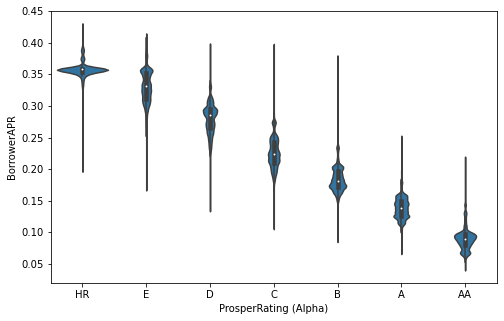

In [107]:
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
Ratings = ['HR','E','D','C','B','A','AA']
# Returns the types for ratings categories with the categories and orderedness
rclasses = pd.api.types.CategoricalDtype(ordered=True, categories=Ratings)
# Convert the "ProsperRating (Alpha)" column from a plain object type into an ordered categorical type 
df1['ProsperRating (Alpha)'] = df1['ProsperRating (Alpha)'].astype(rclasses)
sb.violinplot(data=df1, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color);

The violin plots shows that logically, the better the prosper rating is, the lower the APR gets.

Now let's explore the relationship between the Borrower APR and the employment status.

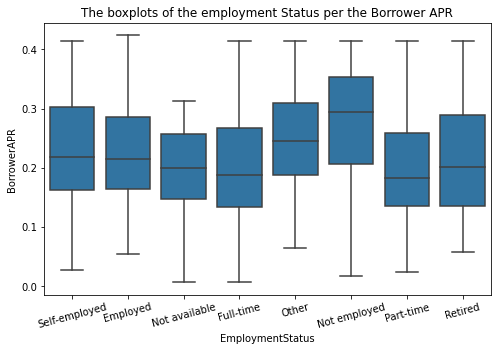

In [110]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=df1, x='EmploymentStatus', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=15)
plt.title('The boxplots of the employment Status per the Borrower APR');


The boxplots show that for the non emlpoyed people, the APR is high : 75% of unemployed people gets an APR over 0.2.
For the employed and retired people, the APR seems balanced : 50% of people gets an API over 0.2.


Now let's look at the relationship between the Employment status and the term. 

In [111]:
# Get the number of loans and each combination of the two variable levels as a pandas Series
counts= df1.groupby(['EmploymentStatus','Term']).size()

In [114]:
# Convert the series into a dataframe object
counts = counts.reset_index(name='count')

In [118]:
# Rearrange the data, to have employment status on rows
counts = counts.pivot(index = 'EmploymentStatus', columns = 'Term', values = 'count')

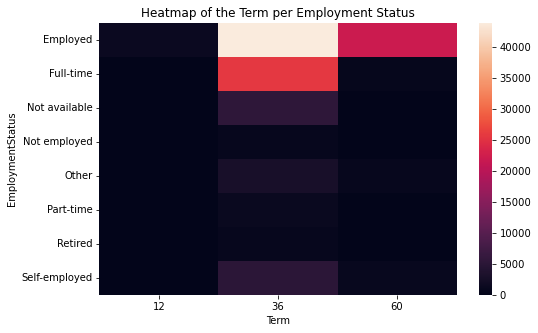

In [125]:
plt.figure(figsize=[8,5])
sb.heatmap(counts)
plt.title('Heatmap of the Term per Employment Status');

As the graduation of colors suggest, employed people ( employed and full time ) gets the most loans for both 3-year and 5-year loans.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The relationship between the loan original amount and the BorrowerAPR suggests that we can categorize the loans into two categories according to the loan original amount : loans less than 25 k and loans over 25k.The loans with an amount less than 25k seem to have a borrower APR between 0.02 and 0.4, for loans with an amount over 25k the APR is between 0.1 and 0.2.

For people declaring they earn less than 10k a month, the Borrower APR is more likely to be between 0.1 and 0.35.

The BorrowerAPR is high for unemployed people : 75% of unemployed people gets an APR over 0.2. For the employed and retired people, the APR seems balanced : 50% of people gets an API over 0.2.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The relationship between the length of the loan and the employments status shows that employed people gets longer loans : 75000 3-year loans are given for employed people compared to less than 5000 3-year loans for part-time employed and retired people respectively.

## Multivariate Exploration



Let's start by exploring the relationship between the Borrower APR, the stated monthly income and the original amount of the loan.

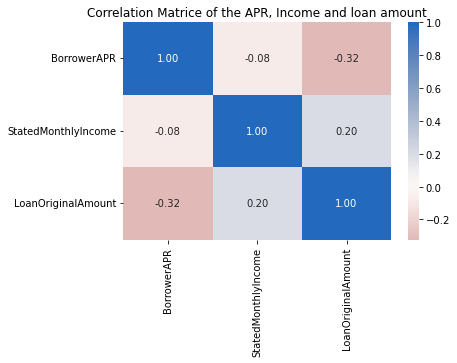

In [132]:
var=['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount']
sb.heatmap(df[var].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrice of the APR, Income and loan amount');


The highest correletion is between the APR and the Original loan amount, the higher the amount is the lower is the APR.

Now let's look at the relationship between the stated monthly income, the Borrower APR, the Term and the loan original amount.

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


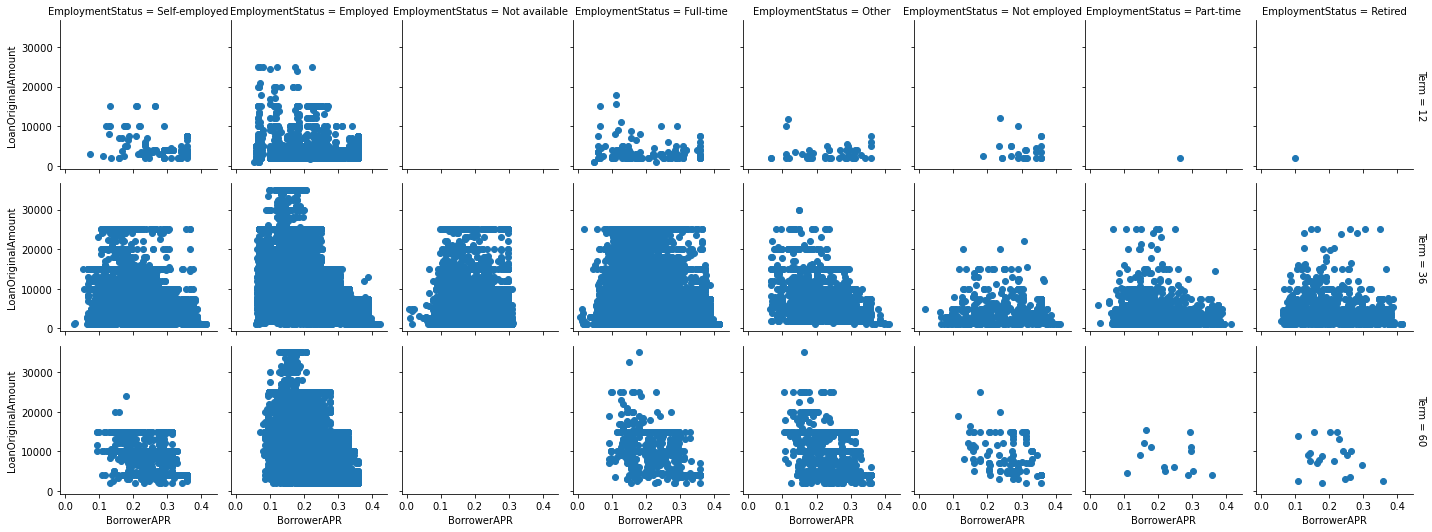

In [138]:
a = sb.FacetGrid(data = df1, col = 'EmploymentStatus', row = 'Term', size = 2.5,
                margin_titles = True)
a.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount');

Let's look at the employed category, the higher amount of loans are given over a low APR.

The retired and unemployed people gets less important amount compared to employed people for 3-year loans. 

For the 5-year loans, retired, part-time employed and unemlpoyed people are less likely to have high amount of loans.

5 year-loans seem to have a maximum value around 20k except for employed people.

Finally let's look at the relationship between the APR, the ProsperRating and the term.

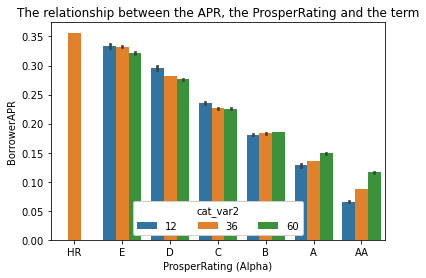

In [152]:
ax = sb.barplot(data = df1, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')
plt.title('The relationship between the APR, the ProsperRating and the term');

On one hand, this confirms the relationship between APR and prosper rating : The highest the prosper rating is, the lowest the APR is.

On the other hand, it shows that long term loans are also given to the people with the highest prosper rating. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Employed people are the most privileged, the least privileged are retired and unemployed people. 

The prosper rating have a negative correlation with APR : The higher the rating is, the lower the APR gets.

### Were there any interesting or surprising interactions between features?

For people with HR rating, only 3-year loans are given. 

## Conclusions

Here is a list of the main findings during this exploration phase : 

- Loans are mostly multiples of 1k.
- We can categorize the loans into two categories according to the loan original amount : loans less than 25 k and loans over 25k.The loans with an amount less than 25k seem to have a borrower APR between 0.02 and 0.4, for loans with an amount over 25k the APR is between 0.1 and 0.2.
- The BorrowerAPR is high for unemployed people : 75% of unemployed people gets an APR over 0.2. For the employed and retired people, the APR seems balanced : 50% of people gets an API over 0.2.
- For people with HR rating, only 3-year loans are given. 